In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [57]:
def ex(h=0.1):
    x = np.arange(0, 1.01, 0.01)
    y0 = 1
    y = np.exp(x)
    plt.figure(figsize=(12, 8))
    plt.plot(x, y, 'b', linewidth=2, label='Exact')
    xt = np.arange(0, 1 + h, h)
    N = len(xt)
    yt = np.zeros(N)
    yt[0] = y0
    for n in range(1, N):
        yt[n] = yt[n-1] + h * np.exp(xt[n-1])
    
    
    plt.plot(xt, yt, '+ r', markersize=12, label=f'Euler, h={h}')
    f_str = 'exp(x)'
    f = np.exp
    result = integrate.solve_ivp(fun=f,
                                 t_span=[xt[0], max(xt)], 
                                 y0=[y0], method='RK45')
    
    yrk = np.interp(xt, result.t, result.y.squeeze())
    
    #plt.plot(xt, yrk, '.g', markersize=30)
    plt.title(f'$dy/dx = \\{f_str}, y_0 = {y0}$', fontsize=16)
    plt.legend(fontsize=14)


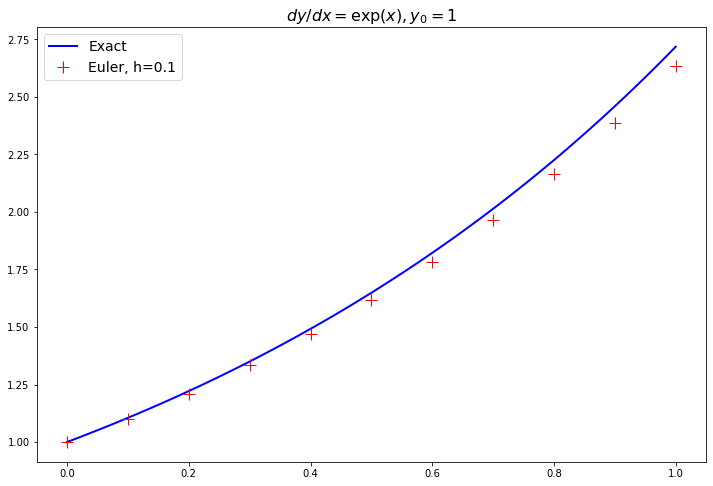

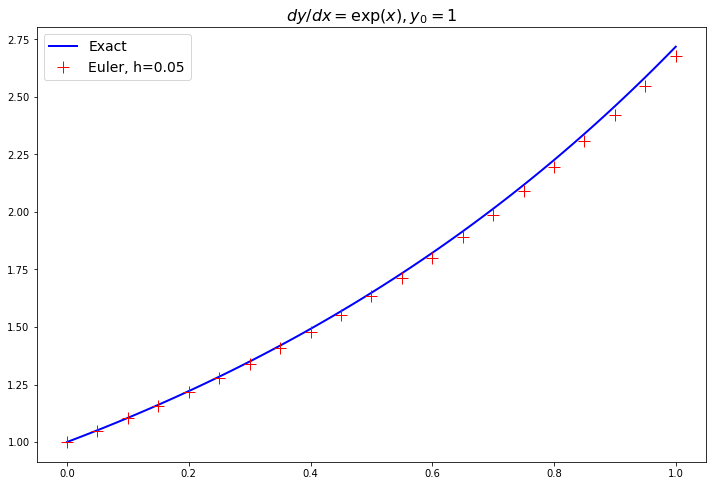

In [58]:
r = ex()
r = ex(h=0.05)

In [113]:
def pcm():
    f = lambda x, y: 4 * np.exp(-0.8 * x) - 0.5 * y
    y0 = 2
    h = 0.5
    xt = np.arange(0, 10 + h, h)
    N = len(xt)
    yt = np.zeros(N)
    yt[0] = y0
    for n in range(1, N):
        yt[n] = yt[n-1] + h * f(xt[n-1], yt[n-1])
    
    plt.figure(figsize=(12, 8))
    plt.plot(xt, yt, 'r', linewidth=2, label='Euler')
    
    # Heun's method
    xt = np.arange(0, 10 + h, h)
    N = len(xt)
    yt = np.zeros(N)
    yt[0] = y0
    for n in range(1, N):
        yt_0 = yt[n-1] + h * f(xt[n-1], yt[n-1])
        yt[n] = yt[n-1] + h * (f(xt[n-1], yt[n-1]) 
                               + f(xt[n], yt_0)) / 2
        
    plt.plot(xt, yt, 'g', linewidth=2, label='Heun')
    
    # Exact (ode45 Runge Kutta)
    x = np.arange(0, 10.1, 0.1)
    result = integrate.solve_ivp(fun=f,
                                 t_span=[x[0], max(x)], 
                                 t_eval=x,
                                 y0=[y0], method='RK45')
    
    # yrk = np.interp(x, result.t, result.y.squeeze())
    
    plt.plot(result.t, result.y.squeeze(), 'b', linewidth=2, label='Exact')
    func_str = '4*\exp(-0.8*x)-0.5*y' 
    plt.title(f'$dy/dx = f(x, y) = {func_str}$', fontsize=16)
    plt.xlabel('x', fontsize=14)
    plt.ylabel('y', fontsize=14)
    plt.legend(fontsize=14)
    

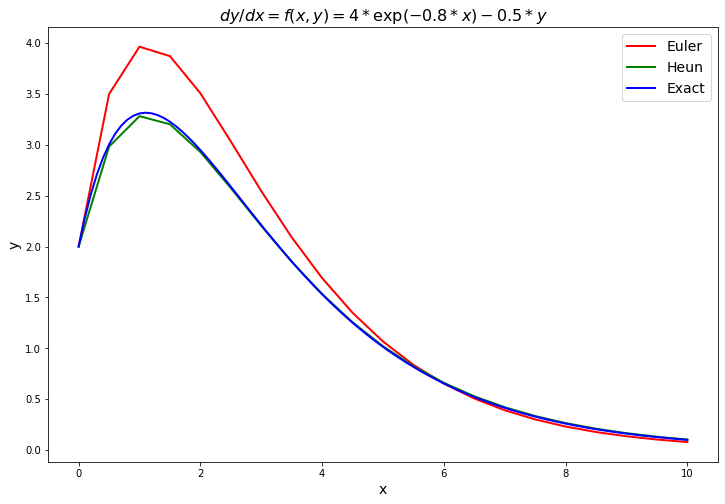

In [114]:
pcm()

In [127]:
def rk():
    h = 1.
    stepsize = 0.1 * h
    x = np.arange(0, 10 + stepsize, stepsize)
    y0 = 0
    y = 0.5 * x**2 + y0
    plt.figure(figsize=(12, 8))
    plt.plot(x, y, 'b', linewidth=2, label='Exact')
    # Euler's method, forward finite difference
    xt = np.arange(0, 10 + h, h)
    N = len(xt)
    yt = np.zeros(N)
    yt[0] = y0
    
    for n in range(1, N):
        yt[n] = yt[n-1] + h * xt[n-1]
    
    plt.plot(xt, yt, 'xr', markersize=12, label=f'Euler, h={h}')
    
    # Runge-Kutta
    
    func_str = 'x'
    f = lambda x, y: x
    
    result = integrate.solve_ivp(fun=f,
                                 t_span=[xt[0], max(xt)], 
                                 t_eval=xt,
                                 y0=[y0], method='RK45')
    yrk = np.interp(xt, result.t, result.y.squeeze())
    
    plt.plot(result.t, result.y.squeeze(), marker='.', linewidth=0, color='lime', markersize=20, label= 'Runge-Kutta (SciPy)')
    plt.title(f'$dy/dx = {func_str}, y_0 = {y0}$', fontsize=16)
    plt.xlim(0, 10.1);
    plt.ylim(0, 51);
    plt.legend(fontsize=14);
    
    
    

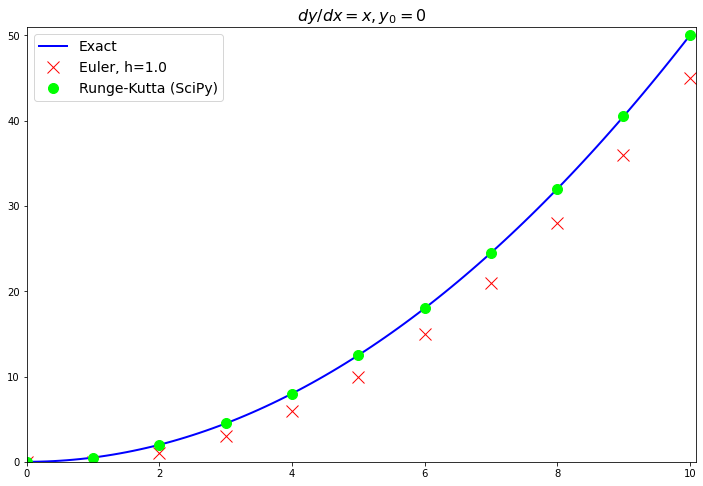

In [128]:
z = rk()